# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
#Your code here
import pandas as pd
df = pd.read_csv('multipleChoiceResponses_cleaned.csv',dtype='unicode')
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
schema= pd.read_csv('schema.csv')
schema.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: object(230)
memory usage: 46.3+ MB


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [4]:
#Your code here
df.FormalEducation.value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [5]:
df.AdjustedCompensation.dtype

dtype('O')

In [6]:
# convert data type of the adjusted compenastion to int
df['AdjustedCompensation'] = pd.to_numeric(df['AdjustedCompensation'], errors='coerce') # turn all non_numeric values to NaN
df['AdjustedCompensation']=df['AdjustedCompensation'].dropna() #drop all Nan


In [7]:
df.AdjustedCompensation.dtype

dtype('float64')

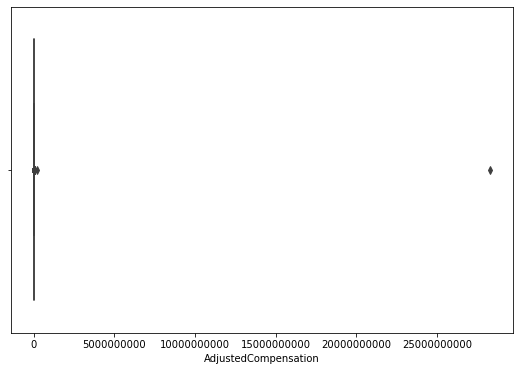

In [8]:
# check for outliers
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(9,6))
sns.boxplot(x=df.AdjustedCompensation)
plt.ticklabel_format(style='plain', axis='x')
plt.show();

In [9]:
'''
The data has lots of outliers,the box plot even cant be visualized well. Remove them and see how it looks
'''

'\nThe data has lots of outliers,the box plot even cant be visualized well. Remove them and see how it looks\n'

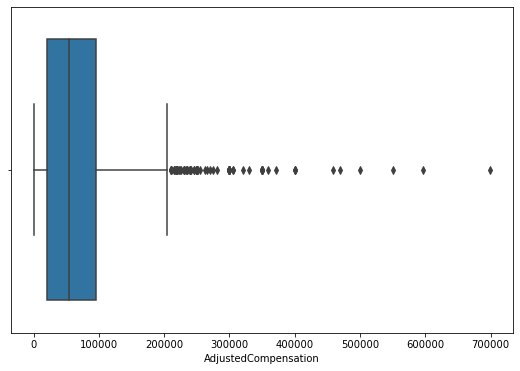

In [10]:
data= df[df.AdjustedCompensation<1000000]
plt.subplots(figsize=(9,6))
sns.boxplot(x=data.AdjustedCompensation)
plt.ticklabel_format(style='plain', axis='x')
plt.show();

In [11]:
'''
I will use adjusted compensation upto 600000
'''

'\nI will use adjusted compensation upto 600000\n'

In [12]:
new_df= df[df.AdjustedCompensation<=600000]

In [13]:
# bachelors and masters dataframe
bachelors= new_df[new_df.FormalEducation == "Bachelor's degree"]
masters = new_df[new_df.FormalEducation == "Master's degree"]

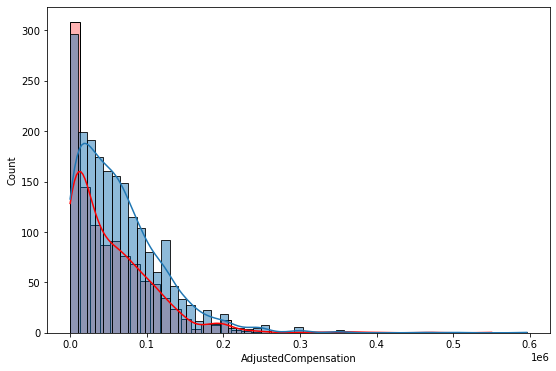

In [14]:

plt.subplots(figsize=(9,6))
sns.histplot(bachelors.AdjustedCompensation, kde=True, color='red', alpha=0.3)
sns.histplot(masters.AdjustedCompensation, kde= True)
plt.ticklabel_format(style='scientific', scilimits=(6,6), axis='x')
plt.show();

In [15]:
'''
The distribution for both is skewed to the right
'''

'\nThe distribution for both is skewed to the right\n'

In [16]:
'''
H_O- there is no difference in the salary of the masters and bachelors degree holders
H_1- there is a significant difference in the salary of the masters and bachelor degree holders
'''

'\nH_O- there is no difference in the salary of the masters and bachelors degree holders\nH_1- there is a significant difference in the salary of the masters and bachelor degree holders\n'

In [17]:
bachelors_mean= bachelors.AdjustedCompensation.mean()
masters_mean= masters.AdjustedCompensation.mean()
print('Bachelors Mean ',str(bachelors_mean),' and Masters Mean ', str(masters_mean)) # masters mean salary looks higher

Bachelors Mean  54193.85731887952  and Masters Mean  64244.46160306552


In [18]:
import numpy as np
var1,var2= np.var(bachelors.AdjustedCompensation), np.var(masters.AdjustedCompensation)
var1, var2 #varying variances

(3273815589.9148474, 3201929951.0417013)

In [19]:
#use 2 sample test for unequal variances
import scipy.stats as stat
stat.ttest_ind(bachelors.AdjustedCompensation,masters.AdjustedCompensation,equal_var= False )

Ttest_indResult(statistic=-4.69574223432871, pvalue=2.8158233509727216e-06)

In [20]:
'''
p_value<0.05, reject the null hypothesis. There is a significant difference between the salaty of the masters
and bachelor degree holders
'''


'\np_value<0.05, reject the null hypothesis. There is a significant difference between the salaty of the masters\nand bachelor degree holders\n'

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [21]:
'''
H_O- there is no difference in the salary of the doctorate and bachelors degree holders
H_1- there is a significant difference in the salary of the doctorate and bachelor degree holders
'''

'\nH_O- there is no difference in the salary of the doctorate and bachelors degree holders\nH_1- there is a significant difference in the salary of the doctorate and bachelor degree holders\n'

In [22]:
#Your code here
doctorates= new_df[new_df.FormalEducation == "Doctoral degree"]
doctorate_mean= doctorates.AdjustedCompensation.mean()
print('Bachelors Mean ',str(bachelors_mean),' and Doctorates Mean ', str(doctorate_mean)) # doctorates mean salary looks higher

Bachelors Mean  54193.85731887952  and Doctorates Mean  86194.98163085166


In [23]:
var1,var2= np.var(bachelors.AdjustedCompensation), np.var(doctorates.AdjustedCompensation)
var1, var2 #varying variances

(3273815589.9148474, 4259522282.6899934)

In [24]:
stat.ttest_ind(bachelors.AdjustedCompensation,doctorates.AdjustedCompensation,equal_var= False )

Ttest_indResult(statistic=-11.770783638263909, pvalue=6.1343225886520566e-31)

In [25]:
'''
p_value<0.05, reject the null hypothesis. There is a significant difference between the salaty of the doctorate
and bachelor degree holders
'''

'\np_value<0.05, reject the null hypothesis. There is a significant difference between the salaty of the doctorate\nand bachelor degree holders\n'

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula='AdjustedCompensation~ C(FormalEducation)'
model = ols(formula, data=new_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2) 
print(anova_table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.700938e+11     6.0  27.521145  2.100218e-32
Residual            1.492153e+13  4322.0        NaN           NaN


## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!